# Projet

In [60]:
%pip install pandas matplotlib seaborn sklearn imblearn xgboost

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


df = pd.read_csv('heart_2020_cleaned.csv')

You should consider upgrading via the 'c:\Users\naelm\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


## Exploration

In [61]:
df.shape

(319795, 18)

In [62]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [63]:
df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

On peut observer les valeurs continues

In [64]:
dfNumber = df.select_dtypes('float64')
dfNumber.head(2)


BMI  PhysicalHealth  MentalHealth  SleepTime
0  16.60             3.0          30.0        5.0
1  20.34             0.0           0.0        7.0

Et les valeurs discrètes 

In [65]:
dfObject = df.select_dtypes('object')
dfObject.head(2)

HeartDisease Smoking AlcoholDrinking Stroke DiffWalking     Sex  \
0           No     Yes              No     No          No  Female   
1           No      No              No    Yes          No  Female   

   AgeCategory   Race Diabetic PhysicalActivity  GenHealth Asthma  \
0        55-59  White      Yes              Yes  Very good    Yes   
1  80 or older  White       No              Yes  Very good     No   

  KidneyDisease SkinCancer  
0            No        Yes  
1            No         No

Quantité de valeus nulles => Le fichier ne contient aucune valeur nulle 

In [66]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [67]:
df = df.replace("No", 0).replace("Yes", 1)

one_hot_sex = pd.get_dummies(df['Sex'])
df = df.drop('Sex',axis = 1)
df = df.join(one_hot_sex)
  
one_hot_ageCategory = pd.get_dummies(df['AgeCategory'])
df = df.drop('AgeCategory',axis = 1)
df = df.join(one_hot_ageCategory)

one_hot_race = pd.get_dummies(df['Race'])
df = df.drop('Race',axis = 1)
df = df.join(one_hot_race)

one_hot_genHealth = pd.get_dummies(df['GenHealth'])
df = df.drop('GenHealth',axis = 1)
df = df.join(one_hot_genHealth)

one_hot_diabetic = pd.get_dummies(df['Diabetic']).rename(columns={1.0: 'Diabetic', 0.0: 'Not diabetic'})
df = df.drop('Diabetic',axis = 1)
df = df.join(one_hot_diabetic)

df

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking  PhysicalActivity  SleepTime  ...  White  \
0               30.0            0                 1        5.0  ...      1   
1                0.0            0                 1        7.0  ...      1   
2               30.0            0                 1        8.0  ...      1   
3                0.0            0                 0        6.0  ...      1   
4                0.0            1                 1        8.0  ...      1   
...              ...          ...               ...        ...  ...    ...   
319790           0.0            1                 0        6.0  ...      0   
319791           0.0            0                 1        5.0  ...      0   
319792           0.0            0                 1        6.0  ...      0   
319793           0.0            0                 0       12.0  ...      0   
319794           0.0            0                 1        8.0  ...      0   

        Excellent  Fair  Good  Poor  Very good  Not diabetic  Diabetic  \
0               0     0     0     0          1             0         1   
1               0     0     0     0          1             1         0   
2               0     1     0     0          0             0         1   
3               0     0     1     0          0             1         0   
4               0     0     0     0          1             1         0   
...           ...   ...   ...   ...        ...           ...       ...   
319790          0     1     0     0          0             0         1   
319791          0     0     0     0          1             1         0   
319792          0     0     1     0          0             1         0   
319793          0     0     1     0          0             1         0   
319794          0     0     1     0          0             1         0   

        No, borderline diabetes  Yes (during pregnancy)  
0                             0                       0  
1                             0                       0  
2                             0                       0  
3                             0                       0  
4                             0                       0  
...                         ...                     ...  
319790                        0                       0  
319791                        0                       0  
319792                        0                       0  
319793                        0                       0  
319794                        0                       0  

[319795 rows x 43 columns]

si les données sont corrélées entre elles, si à l’aide
d’une représentation graphique de vos données vous pouvez déjà tirer des théories sur les
features représentant le plus d’informations

=> Il y a 27373 personnes sur les 319795 qui souffrent de maladies cardiaques

=> Sur les 27373 personnes, 16037 d'entre elles fument, 1141 boivent de l'alcool, 890 fument et boivent

=> Sur les 27373 personnes, 15497 ont un temps de sommeil inférieur aux 8 heures recommandées

Heart Disease : 27373
And Smoking : 16037
And Drinking : 1141
And Both : 890
All Smoking and Drinking : 13415


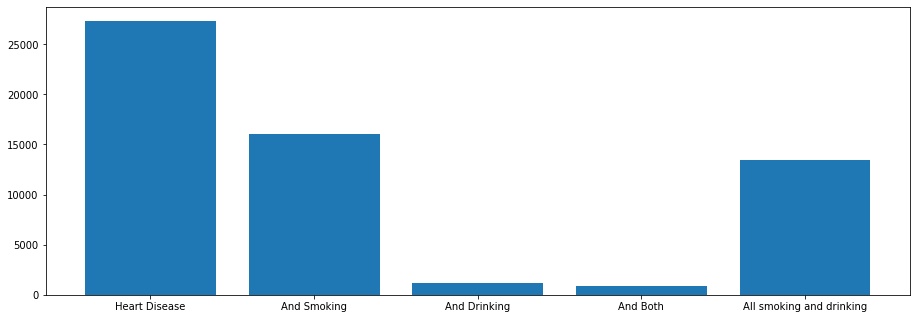

In [68]:
numberHeartDisease = len(df[df['HeartDisease'] == 1])
numberHeartDiseaseAndSmoking = len(df[(df['HeartDisease'] == 1) & (df['Smoking'] == 1)])
numberHeartDiseaseAndDrinking = len(df[(df['HeartDisease'] == 1) & (df['AlcoholDrinking'] == 1)])
numberHeartDiseaseAndSmokingAndDrinking = len(df[(df['HeartDisease'] == 1) & (df['AlcoholDrinking'] == 1) & (df['Smoking'] == 1)])
numberSmokingAndDrinking = len(df[(df['AlcoholDrinking'] == 1) & (df['Smoking'] == 1)])

print(f"Heart Disease : {numberHeartDisease}")
print(f"And Smoking : {numberHeartDiseaseAndSmoking}")
print(f"And Drinking : {numberHeartDiseaseAndDrinking}")
print(f"And Both : {numberHeartDiseaseAndSmokingAndDrinking}")
print(f"All Smoking and Drinking : {numberSmokingAndDrinking}")

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
criterias = ['Heart Disease', 'And Smoking', 'And Drinking', 'And Both', 'All smoking and drinking']
stats = [numberHeartDisease, numberHeartDiseaseAndSmoking, numberHeartDiseaseAndDrinking,numberHeartDiseaseAndSmokingAndDrinking, numberSmokingAndDrinking]
ax.bar(criterias, stats)
plt.show()

## Observations et Hypothèses 

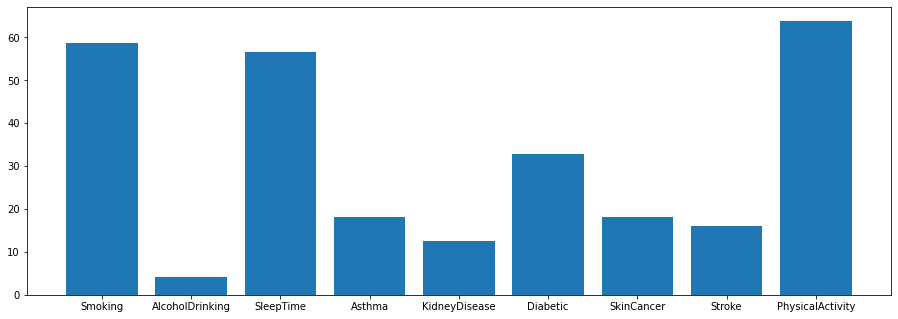

Smoking : 58.586928725386336
AlcoholDrinking : 4.168341066013955
SleepTime : 56.614181858035295
Asthma : 18.021407956745698
KidneyDisease : 12.621926716107112
Diabetic : 32.722025353450476
SkinCancer : 18.19310999890403
Stroke : 16.034048149636504
PhysicalActivity : 63.89142585759691


In [69]:
heartDiseased = df[df['HeartDisease'] == 1]
smoking = len(df[(df['HeartDisease'] == 1) & (df['Smoking'] == 1)]) / len(heartDiseased) * 100
alcool = len(df[(df['HeartDisease'] == 1) & (df['AlcoholDrinking'] == 1)]) / len(heartDiseased) * 100
sleeptime = len(df[(df['HeartDisease'] == 1) & (df['SleepTime'] < 8)]) / len(heartDiseased) * 100
asthma = len(df[(df['HeartDisease'] == 1) & (df['Asthma'] == 1)]) / len(heartDiseased) * 100
kidney = len(df[(df['HeartDisease'] == 1) & (df['KidneyDisease'] == 1)]) / len(heartDiseased) * 100
diabetic = len(df[(df['HeartDisease'] == 1) & (df['Diabetic'] == 1)]) / len(heartDiseased) * 100
skinCancer = len(df[(df['HeartDisease'] == 1) & (df['SkinCancer'] == 1)]) / len(heartDiseased) * 100
stroke = len(df[(df['HeartDisease'] == 1) & (df['Stroke'] == 1)]) / len(heartDiseased) * 100
physicalActivity = len(df[(df['HeartDisease'] == 1) & (df['PhysicalActivity'] == 1)]) / len(heartDiseased) * 100

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
criterias = ['Smoking', 'AlcoholDrinking', 'SleepTime', 'Asthma', 'KidneyDisease', 'Diabetic', 'SkinCancer', 'Stroke', 'PhysicalActivity']
stats = [smoking, alcool, sleeptime, asthma, kidney, diabetic, skinCancer, stroke, physicalActivity]
ax.bar(criterias, stats)
plt.show()

print(f"Smoking : {smoking}")
print(f"AlcoholDrinking : {alcool}")
print(f"SleepTime : {sleeptime}")
print(f"Asthma : {asthma}")
print(f"KidneyDisease : {kidney}")
print(f"Diabetic : {diabetic}")
print(f"SkinCancer : {skinCancer}")
print(f"Stroke : {stroke}")
print(f"PhysicalActivity : {physicalActivity}")

BMI


C:\Users\naelm\AppData\Local\Temp\ipykernel_15280\1291757220.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  current = heartDiseased.drop('HeartDisease', 1)


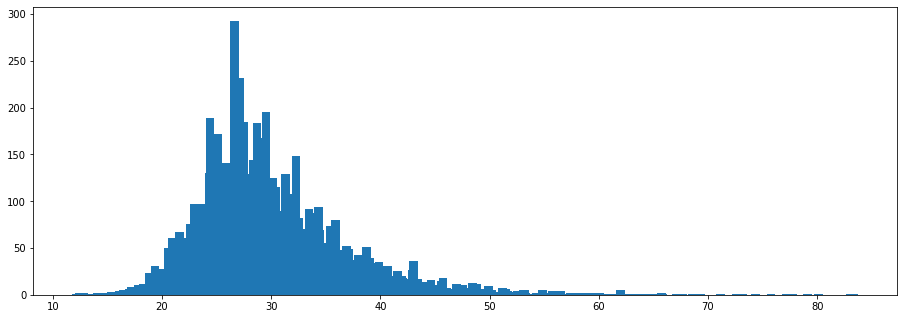

Smoking


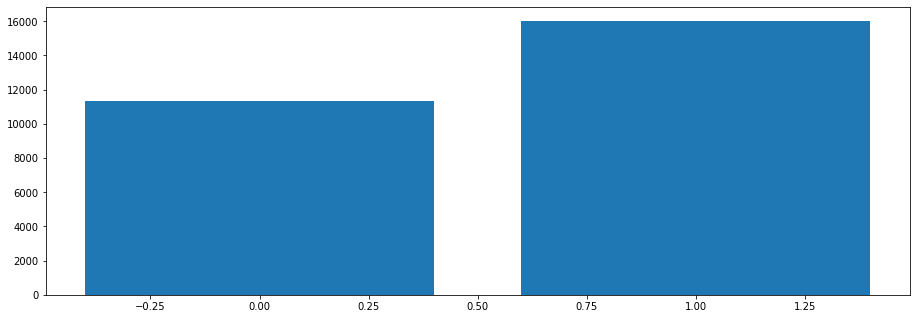

AlcoholDrinking


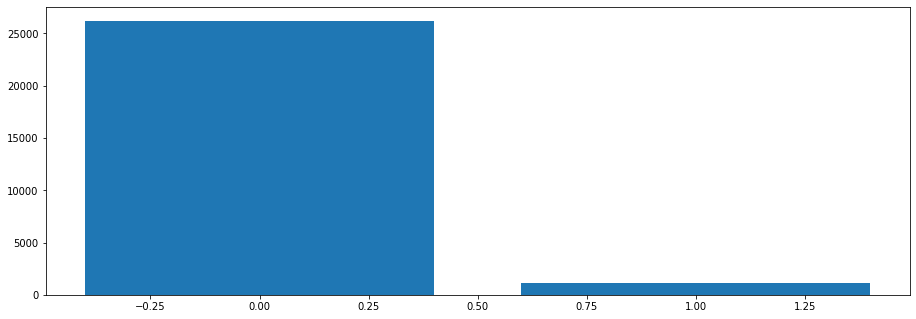

Stroke


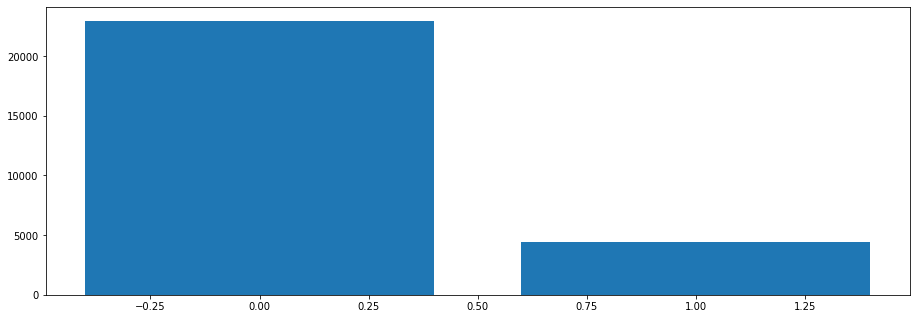

PhysicalHealth


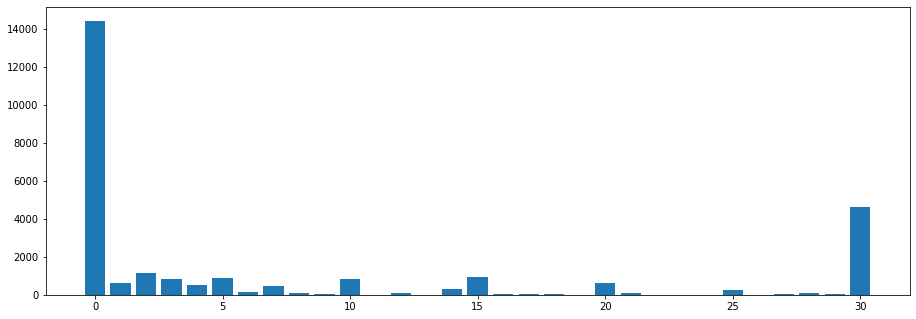

MentalHealth


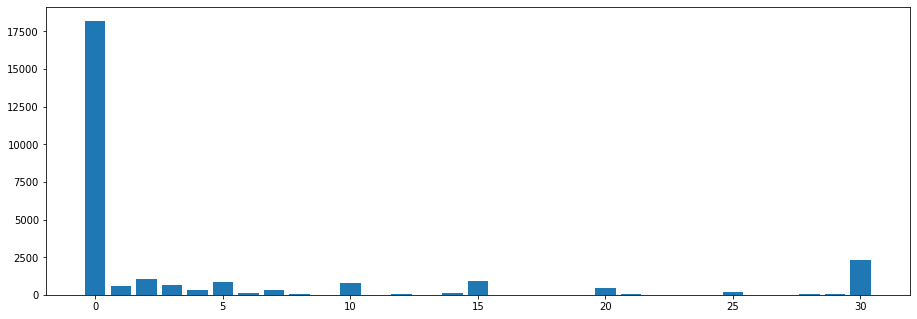

DiffWalking


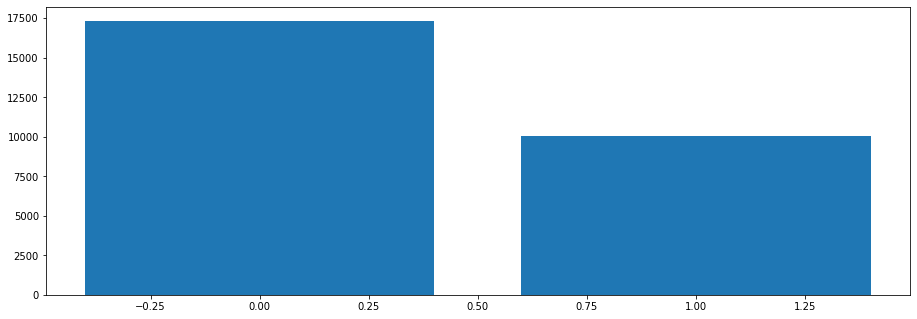

PhysicalActivity


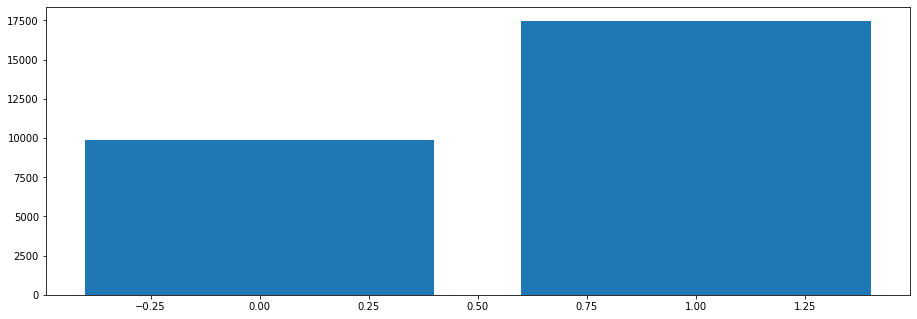

SleepTime


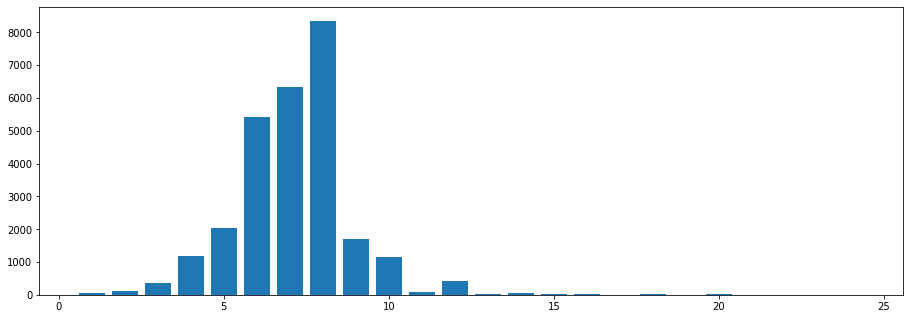

Asthma


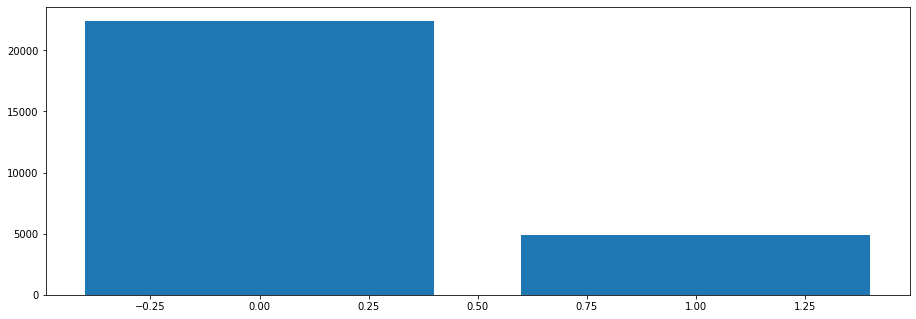

KidneyDisease


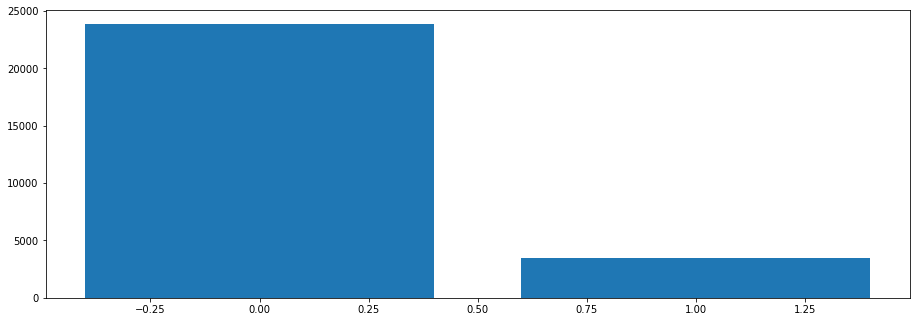

SkinCancer


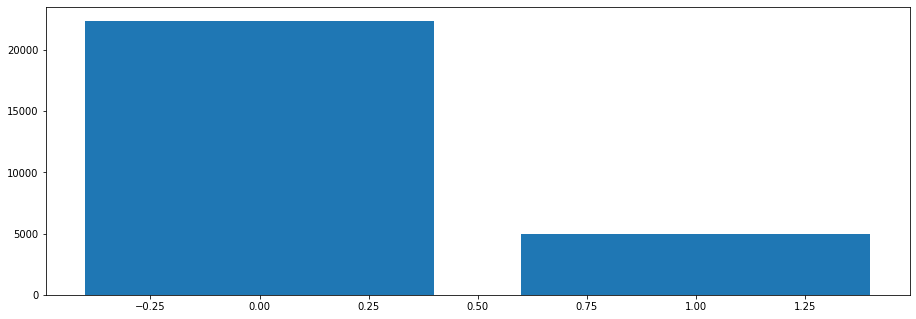

Female


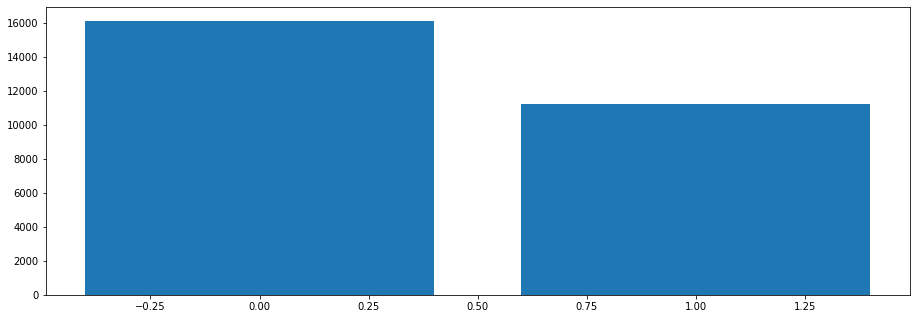

Male


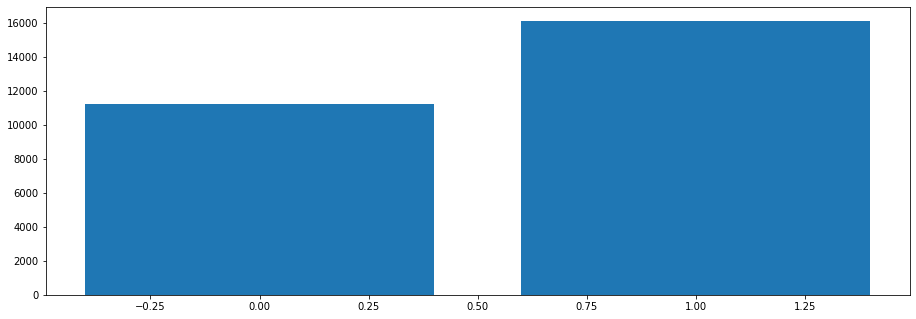

18-24


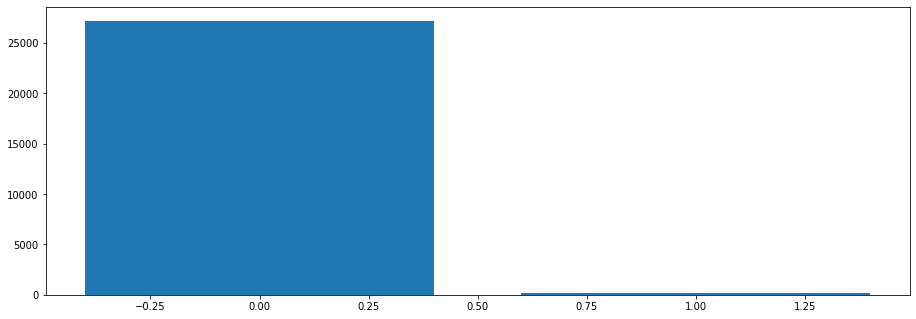

25-29


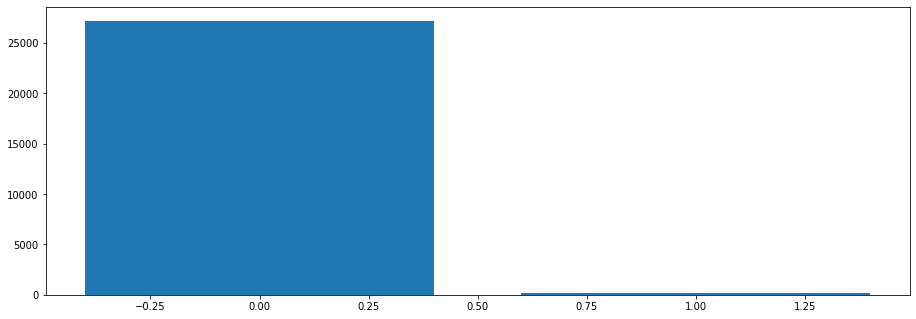

30-34


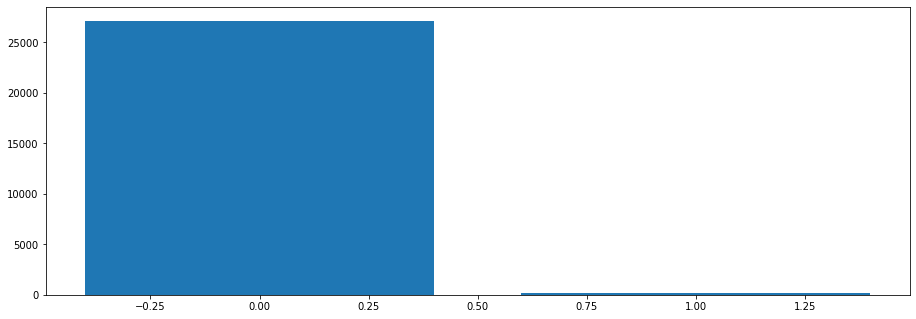

35-39


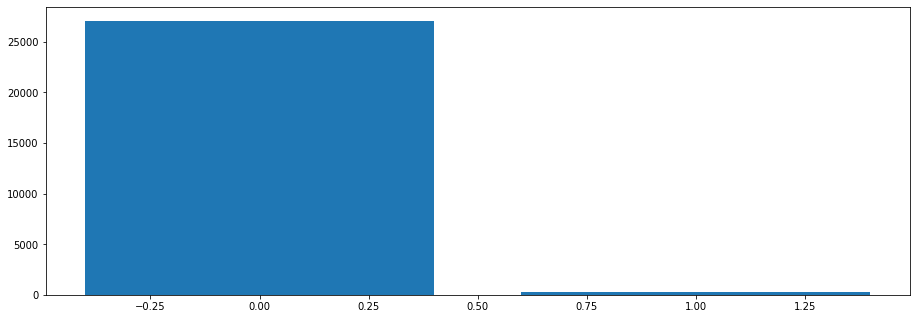

40-44


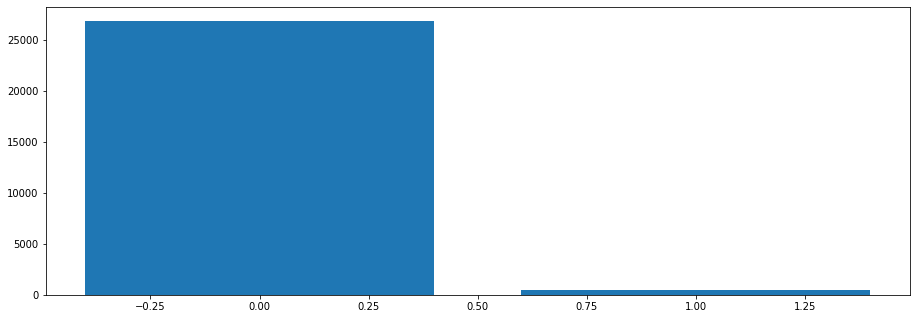

45-49


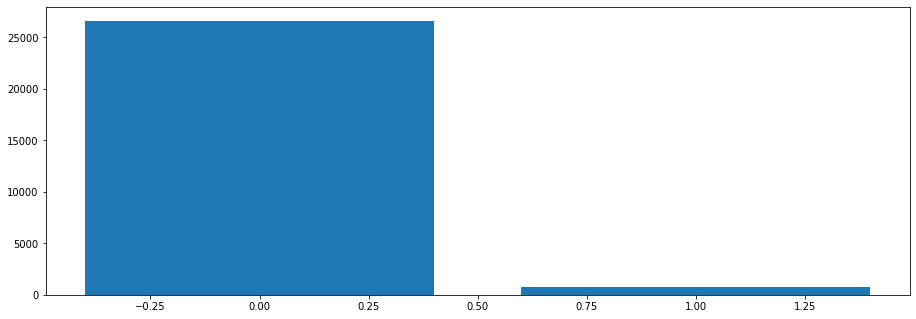

50-54


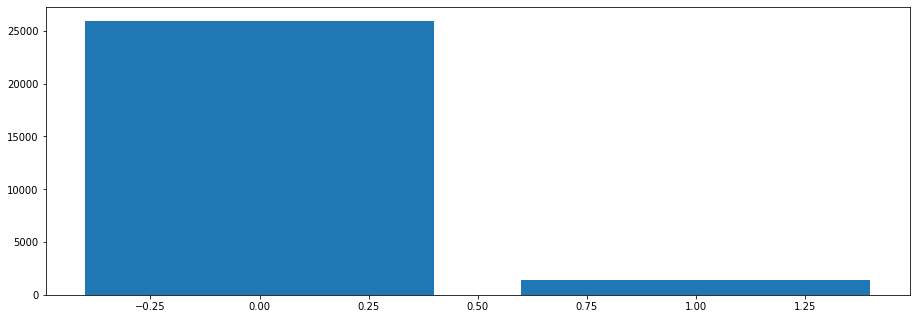

55-59


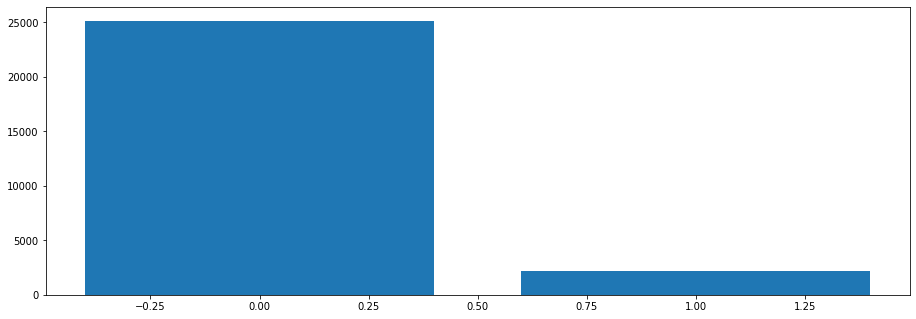

60-64


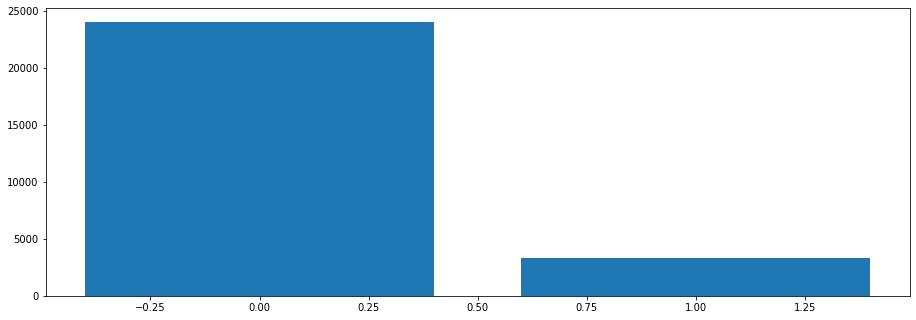

65-69


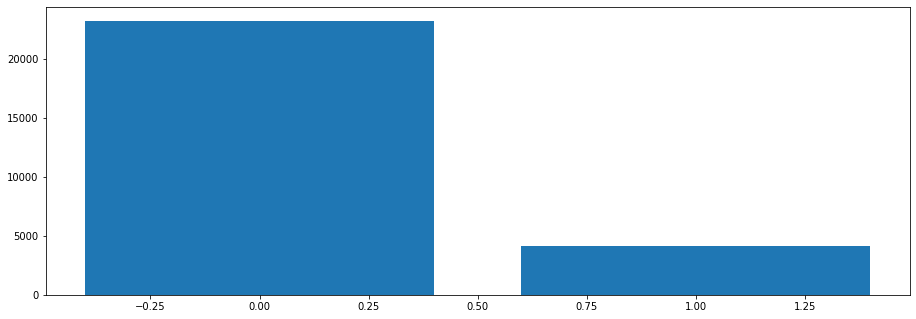

70-74


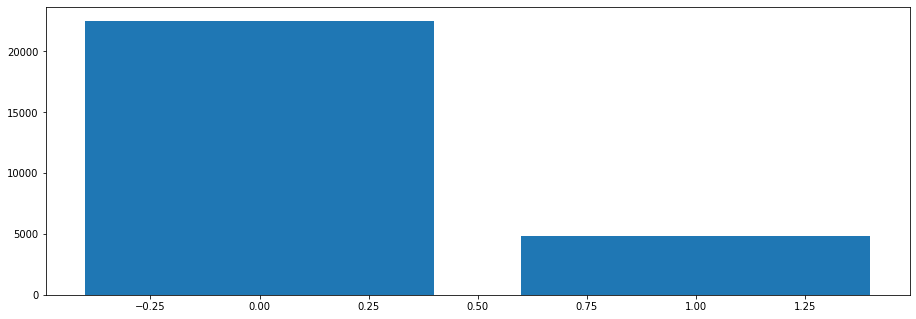

75-79


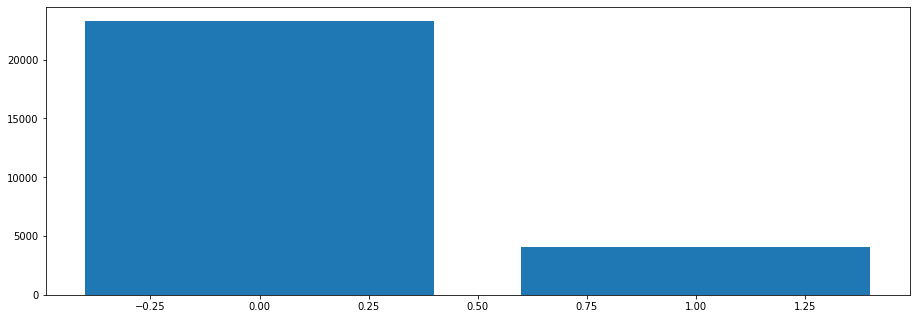

80 or older


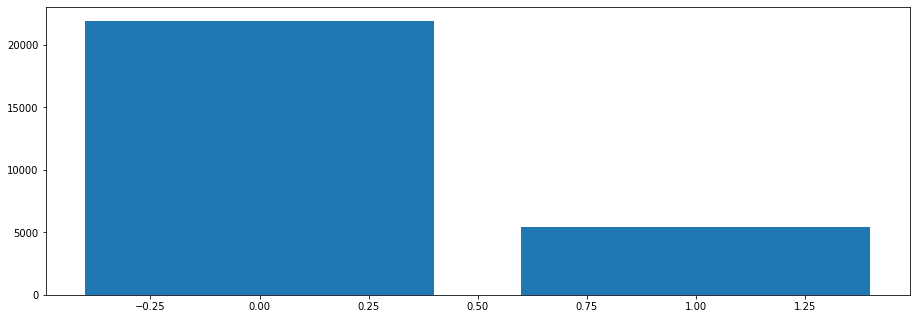

American Indian/Alaskan Native


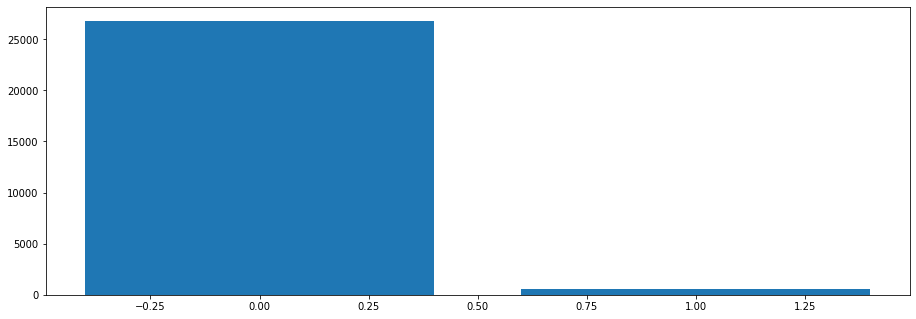

Asian


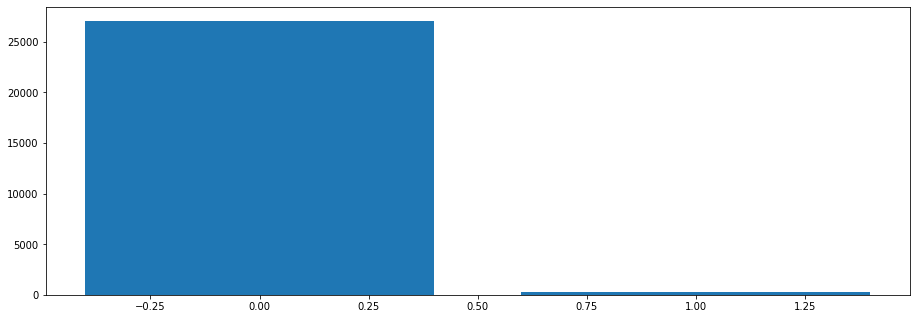

Black


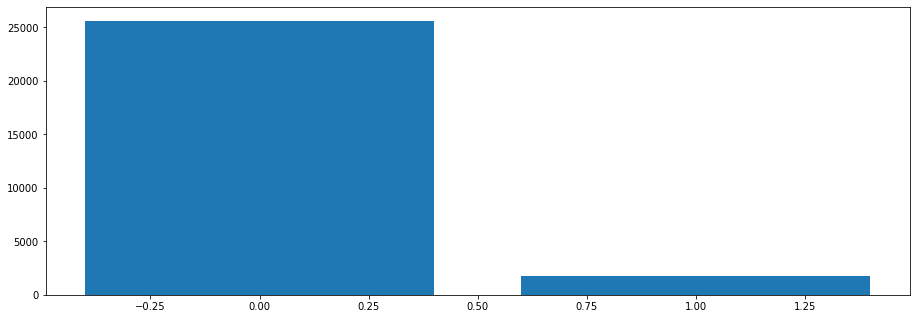

Hispanic


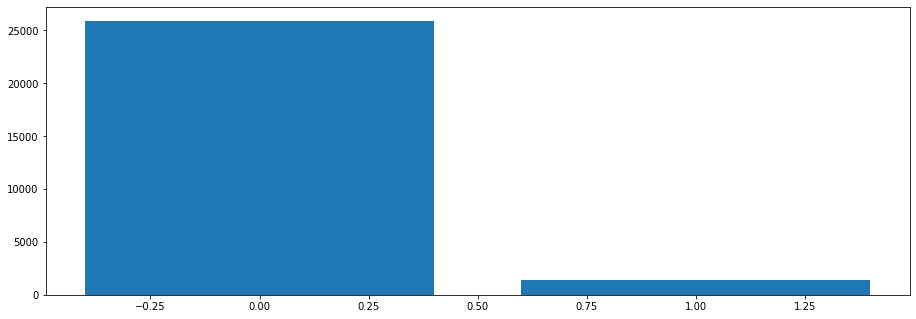

Other


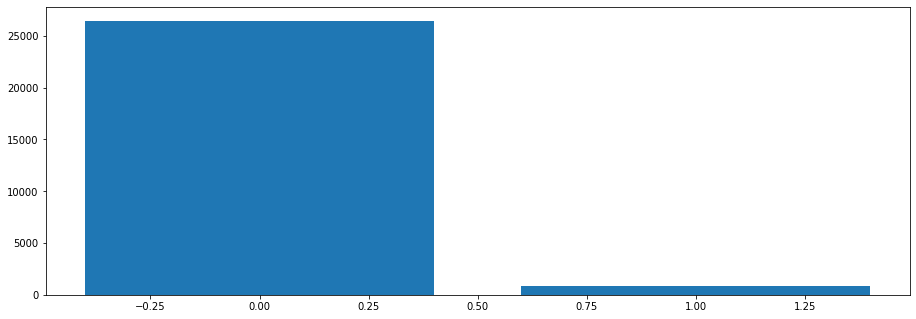

White


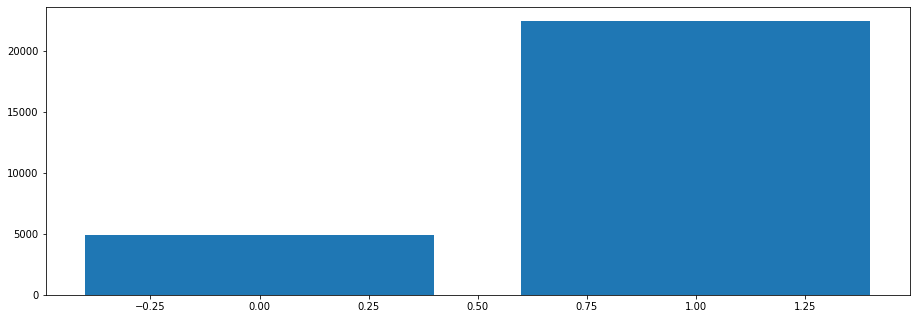

Excellent


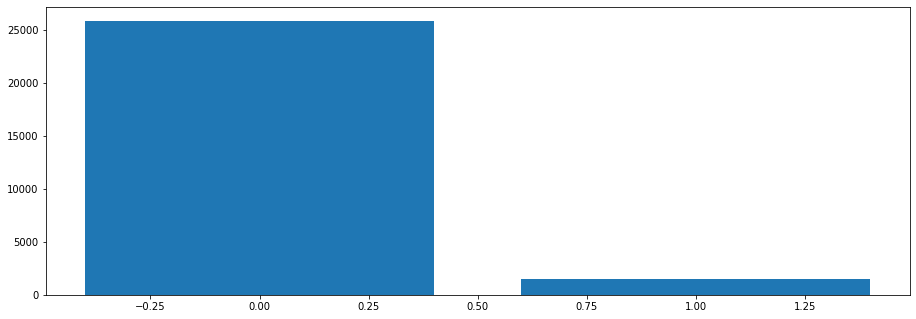

Fair


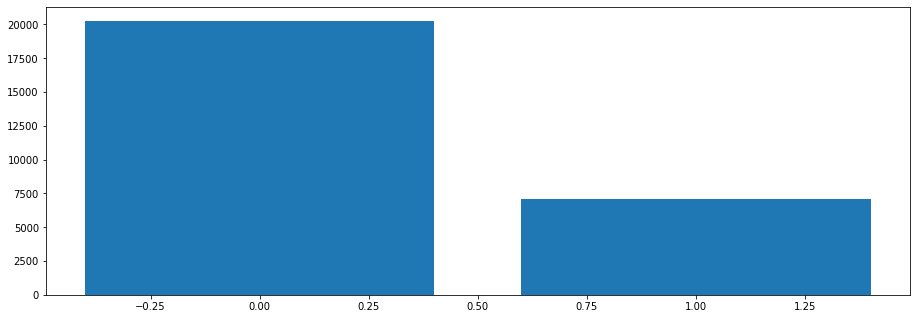

Good


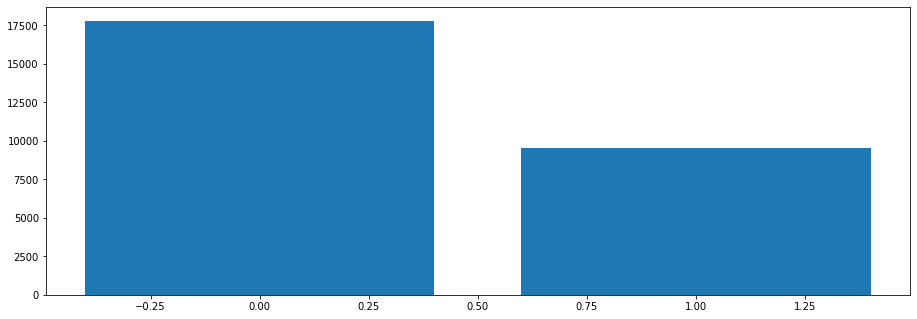

Poor


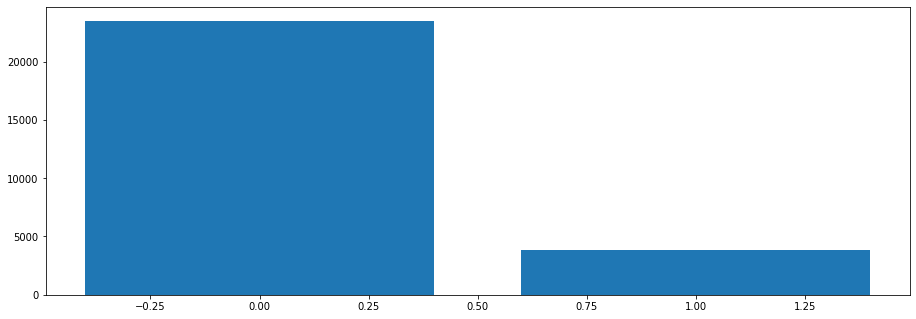

Very good


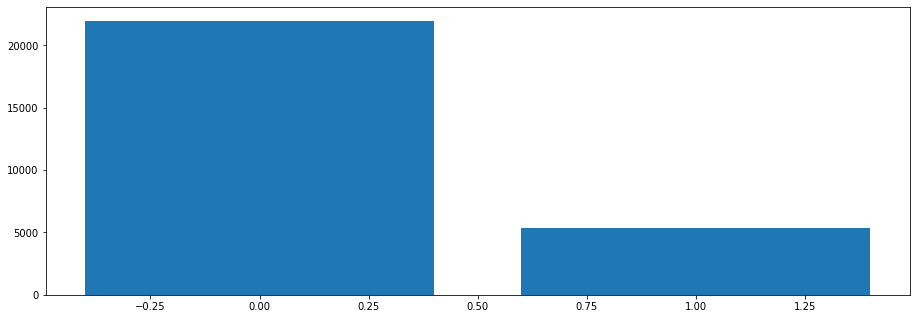

Not diabetic


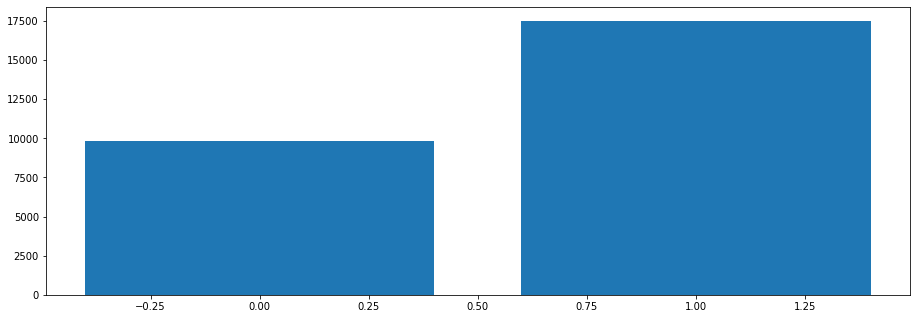

Diabetic


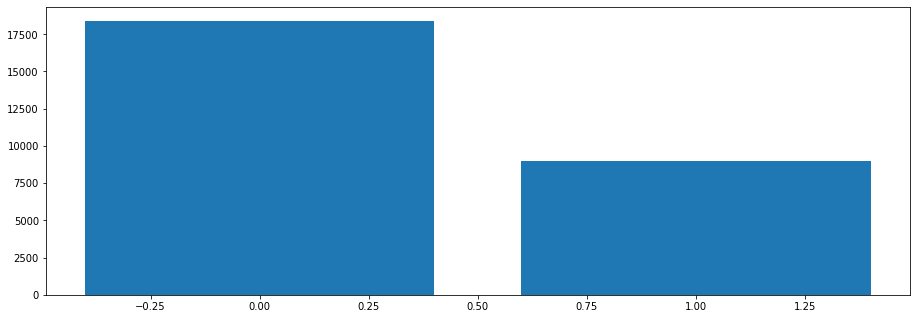

No, borderline diabetes


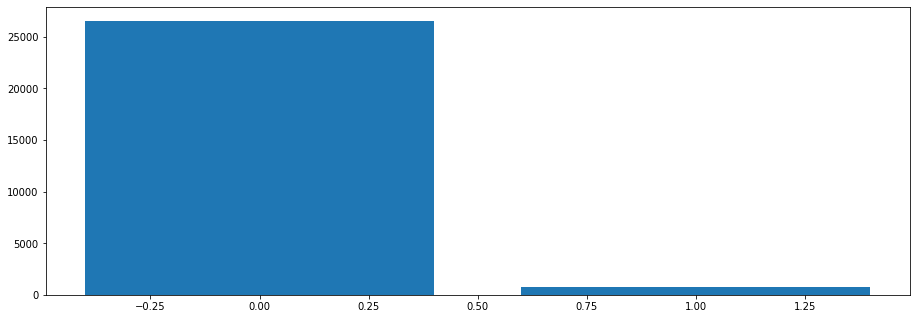

Yes (during pregnancy)


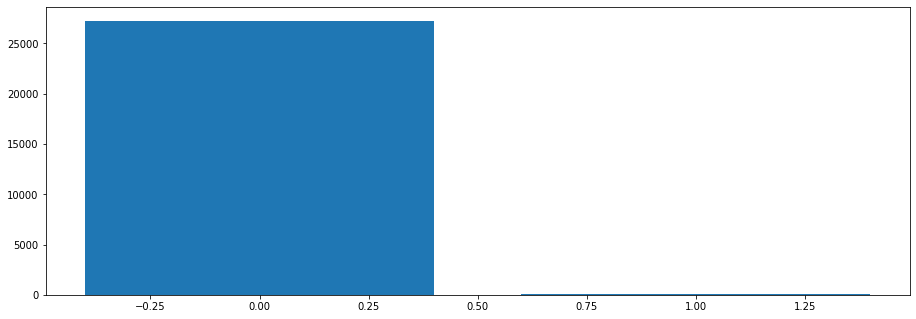

In [70]:
current = heartDiseased.drop('HeartDisease', 1)
for str in current.columns:
    print(str)
    values = current[str].value_counts()
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(values.index.tolist(), values.tolist())
    plt.show()


Compairason de certaines combinaisons entre la population entière et les personnes malades.

Smoking : 131908 
Heart Disease And Smoking : 16037, 12.157715983867543
Drinking : 131908
Heart Disease And Drinking : 1141, 0.8649968159626407
Stroke : 12069
Heart Disease And Stroke : 4389, 36.36589609743972
Diabetic : 40802
Heart Disease And Diabetic : 8957, 21.952355276702125
Asthma : 42872
Heart Disease And Asthma : 4933, 11.506344467251353


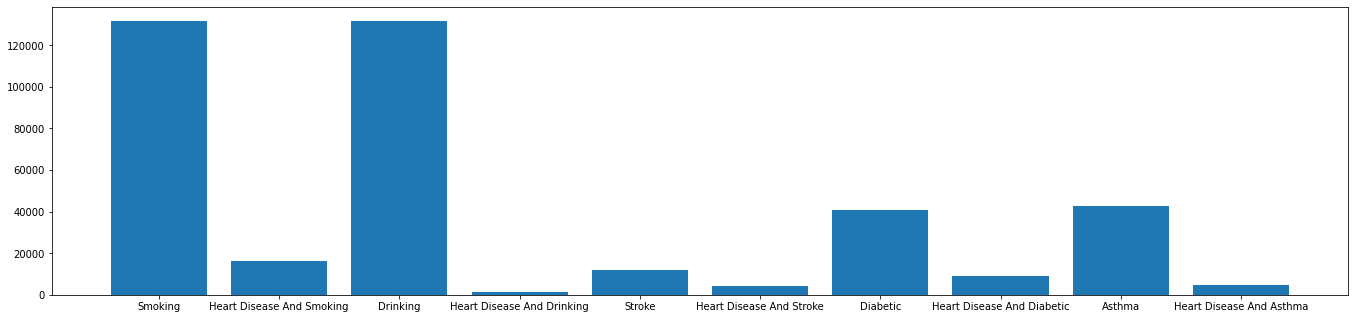

In [71]:
numberHeartDiseaseAndSmoking = len(df[(df['HeartDisease'] == 1) & (df['Smoking'] == 1)])
numberSmoking = len(df[df['Smoking'] == 1])
numberHeartDiseaseAndDrinking = len(df[(df['HeartDisease'] == 1) & (df['AlcoholDrinking'] == 1)])
numberDrinking = len(df[df['Smoking'] == 1])
numberHeartDiseaseAndStroke = len(df[(df['HeartDisease'] == 1) & (df['Stroke'] == 1)])
numberStroke = len(df[df['Stroke'] == 1])
numberHeartDiseaseAndDiabetic = len(df[(df['HeartDisease'] == 1) & (df['Diabetic'] == 1)])
numberDiabetic = len(df[df['Diabetic'] == 1])
numberHeartDiseaseAndAsthma = len(df[(df['HeartDisease'] == 1) & (df['Asthma'] == 1)])
numberAsthma = len(df[df['Asthma'] == 1])

print(f"Smoking : {numberSmoking} ")
print(f"Heart Disease And Smoking : {numberHeartDiseaseAndSmoking}, {numberHeartDiseaseAndSmoking / numberSmoking * 100}")
print(f"Drinking : {numberDrinking}")
print(f"Heart Disease And Drinking : {numberHeartDiseaseAndDrinking}, {numberHeartDiseaseAndDrinking / numberDrinking * 100}")
print(f"Stroke : {numberStroke}")
print(f"Heart Disease And Stroke : {numberHeartDiseaseAndStroke}, {numberHeartDiseaseAndStroke / numberStroke * 100}")
print(f"Diabetic : {numberDiabetic}")
print(f"Heart Disease And Diabetic : {numberHeartDiseaseAndDiabetic}, {numberHeartDiseaseAndDiabetic / numberDiabetic * 100}")
print(f"Asthma : {numberAsthma}")
print(f"Heart Disease And Asthma : {numberHeartDiseaseAndAsthma}, {numberHeartDiseaseAndAsthma / numberAsthma * 100}")

fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
criterias = [
    'Smoking', 
    'Heart Disease And Smoking', 
    'Drinking',
    'Heart Disease And Drinking', 
    'Stroke',
    'Heart Disease And Stroke', 
    'Diabetic', 
    'Heart Disease And Diabetic', 
    'Asthma', 
    'Heart Disease And Asthma', 
]
stats = [
    numberSmoking,
    numberHeartDiseaseAndSmoking,
    numberDrinking,
    numberHeartDiseaseAndDrinking,
    numberStroke,
    numberHeartDiseaseAndStroke,
    numberDiabetic,
    numberHeartDiseaseAndDiabetic,
    numberAsthma,
    numberHeartDiseaseAndAsthma,
]
ax.bar(criterias, stats)
plt.show()

On choisis d'évaluer les deux critères les plus récurrents dans la population des malades

HeartDisease with other illnesses: 1801 
No HeartDisease with other illnesses: 1943 
48.10363247863248% of the people that are diabetic and suffered a stroke have a heart disease.


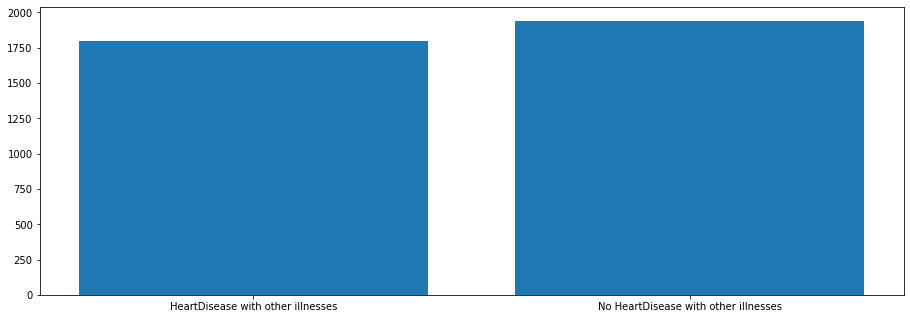

In [72]:
illWithDiseases = len(df[(df['HeartDisease'] == 1) & (df['Stroke'] == 1) & (df['Diabetic'] == 1)])
healthyWithDiseases = len(df[(df['HeartDisease'] == 0) & (df['Stroke'] == 1) & (df['Diabetic'] == 1)])

print(f"HeartDisease with other illnesses: {illWithDiseases} ")
print(f"No HeartDisease with other illnesses: {healthyWithDiseases} ")
print(f"{(illWithDiseases * 100) / (illWithDiseases + healthyWithDiseases)}% of the people that are diabetic and suffered a stroke have a heart disease.")

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
criterias = ['HeartDisease with other illnesses', 'No HeartDisease with other illnesses']
stats = [illWithDiseases, healthyWithDiseases]
ax.bar(criterias, stats)
plt.show()

# Etude à travers des modèles 

## Split des données

Pour appliquer nos différrents modèles, on doit faire en sorte qu'on ai le meme nombre de lignes et de colonnes pour X(L1) et Y(L2)

In [74]:
df.describe()
X = df.drop(columns =["HeartDisease"], axis = 1)
Y = df["HeartDisease"]
X_train, x_test, Y_train, y_test = train_test_split(X,Y,shuffle = True, test_size=0.1,random_state=42)

ros = RandomOverSampler(random_state =42)
X_train_resampled , y_train_resampled , = ros.fit_resample(X_train , Y_train)
X_train_test , y_train_test , = ros.fit_resample(x_test , y_test)
y_train_resampled.value_counts()

0    263310
1    263310
Name: HeartDisease, dtype: int64

## Modèle 1: Logistic Regression

In [78]:
lr=LogisticRegression(solver='liblinear', max_iter=1000)
#lbfgs warning : Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm.
#That's why we recude the number of max iteration and select a specific solver.
lr.fit(X_train_resampled , y_train_resampled)
prediction = lr.predict(x_test)
print(classification_report(y_test,prediction))
#print(lr.score(X_train_resampled,y_train_resampled)) to get the accuracy alone

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     29112
           1       0.23      0.78      0.36      2868

    accuracy                           0.75     31980
   macro avg       0.60      0.76      0.60     31980
weighted avg       0.90      0.75      0.80     31980



On remarque que notre taux de précision est de 76%.

Cette valeur est due au fait que ce modèle est plus précis avec des valeurs continues, alors que nous disposons principalement de valeurs discrètes.

Nos données comme "Smoking" et "Diabetic" sont plus importantes que d'autres valeurs pour déterminé si le sujet est malade d'une maladie de coeur. Hors ce modèle accorde la même importance à chaque feature. 

Ce résultat est peut-être aussi dû à un surentraînement à cause de nos valeurs répétitives d'où l'importance de préparer nos données afin de l'éviter.

## Modèle 2: Random Forest

In [84]:
rf=RandomForestClassifier(n_estimators=20)
rf.fit(X_train_resampled , y_train_resampled)
prediction2 = rf.predict(x_test)
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     29112
           1       0.29      0.21      0.24      2868

    accuracy                           0.88     31980
   macro avg       0.61      0.58      0.59     31980
weighted avg       0.87      0.88      0.87     31980



On remarque que notre taux de précision est de 58%

Le taux de précision varie suivant le paramètre "n_estimators".
Ce paramètre correspond au nombre d'arbre qui va "prendre une décision" (choix binaire).
On constate qu'avec 20 arbres, le taux de précision est assez faible.

On en déduit que les différentes données n'ont pas la même importance sur le fait qu'une personne soit malade ou non. 

On suppose que la combinaison de certaines valeurs entre elles entrainera un meilleur taux de réussite.

Par exemple, une personne, dont les caractéristiques "smoking" et "Diabetic" sont plus élevés, est plus susceptibles d'avoir une maladie du coeur.

In [85]:
rf=RandomForestClassifier(n_estimators=20,max_depth=10)
rf.fit(X_train_resampled , y_train_resampled)
prediction2 = rf.predict(x_test)
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     29112
           1       0.23      0.75      0.35      2868

    accuracy                           0.75     31980
   macro avg       0.60      0.75      0.60     31980
weighted avg       0.90      0.75      0.80     31980



Dans ce deuxième essai, on remarque que la combinaison des facteurs impacte grandement le taux de précision et la rapidité d'éxecution.

## Modèle 3: XGBoost

In [89]:
xgb_clf = XGBClassifier()
grid = {
    'objective':['binary:logistic'],
    'max_depth': [2,4,6],
    'alpha': [3],
    'learning_rate': [1.0],
    'n_estimators':[10]
}
model = GridSearchCV(xgb_clf, grid, scoring='accuracy', verbose=1)
model.fit(X_train_resampled,y_train_resampled)
print(model.best_score_)
print(model.best_params_)
xgb_clf.fit(X_train_resampled,y_train_resampled)
prediction3 = model.predict(x_test)
print(classification_report(y_test,prediction3))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.7691941058068437
{'alpha': 3, 'learning_rate': 1.0, 'max_depth': 6, 'n_estimators': 10, 'objective': 'binary:logistic'}
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     29112
           1       0.22      0.78      0.34      2868

    accuracy                           0.73     31980
   macro avg       0.60      0.76      0.59     31980
weighted avg       0.90      0.73      0.79     31980



On remarque que notre taux de précision est de 76%

Ce modèle est très similaire au modèle Random Forest, sauf qu'il ne se charge pas d'optimiser le modèle lui-même.

On utilise donc GridSearchCV qui cette charge de trouver les paramètres optimaux pour le XGBoost.